In [1]:
# Check Python Kernel version
# If you run a ROOT binary file fromthe CERN website, it was compile for Python 2
from platform import python_version
print(python_version())

2.7.12


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Import PyROOT
import ROOT

Welcome to JupyROOT 6.18/00


## Openning ROOT file and Loading the Histograms

For more commands and examples, please refer to the [CERN Manual - Chapter Histograms](https://root.cern.ch/root/htmldoc/guides/users-guide/Histograms.html).

In [4]:
# Load ROOT files
histFile_2GeV = ROOT.TFile.Open("../Energy Deposition/edep-build/run01_2GeV.root", "READ")
histFile_8GeV = ROOT.TFile.Open("../Energy Deposition/edep-build/run02_8GeV.root", "READ")

In [5]:
# Open the Histogram

# https://root.cern.ch/doc/master/classTH1.html#a9b9fc72d52be07372979ab74d1365fcf
hist2GeV = histFile_2GeV.Get("11")
hist8GeV = histFile_8GeV.Get("11")

## Check if histogram exists
if not hist2GeV:
    print ("Failed  to get histogram 2GeV")
else:
    print('Histogram loaded')
#
## Check if histogram exists
if not hist8GeV:
    print ("Failed  to get histogram 8GeV")
else:
    print('Histogram loaded')

Histogram loaded
Histogram loaded


## Plot Histograms

In [6]:
# Open an empty canvas
c1 = ROOT.TCanvas('c1', 'Canvas Title')

In [7]:
hist2GeV.Draw()
#
hist2GeV.SetLineColor(ROOT.kBlue)
hist2GeV.SetLineStyle(1)
hist2GeV.SetStats(False)

In [8]:
hist8GeV.Draw("same")
#
hist8GeV.SetLineColor(ROOT.kRed)
hist8GeV.SetLineStyle(1)
#
hist8GeV.SetStats(False)

In [9]:
hist2GeV.SetTitle("Longitudinal Energy Deposited Profile")
#
# Need to discover how to scale x-axis from histograms
#
hist2GeV.GetXaxis().SetTitle("Crystal length [x0.5 cm]")
hist2GeV.GetXaxis().CenterTitle(True) # Center the x-axis
hist2GeV.GetYaxis().SetTitle("Events")
hist2GeV.GetYaxis().CenterTitle(True) # Center the y-axis
#
hist2GeV.SetAxisRange(0., 200.,"X")
hist2GeV.SetAxisRange(0., 140.,"Y")

In [10]:
# Add legend to the graph
#
# The argument sets the position and size of the legend
# TLegend(xmin, ymin, xmax, ymax)
legend = ROOT.TLegend(0.6, 0.7, 0.87, 0.85)
#
# Add entries
legend.AddEntry(hist2GeV, "2 GeV Electron", "l")
legend.AddEntry(hist8GeV, "8 GeV Electron", "l")
#
legend.SetTextFont(42) # Set the font of the legend text
legend.SetTextSize(0.045) # Set the size of the legend text
legend.Draw()

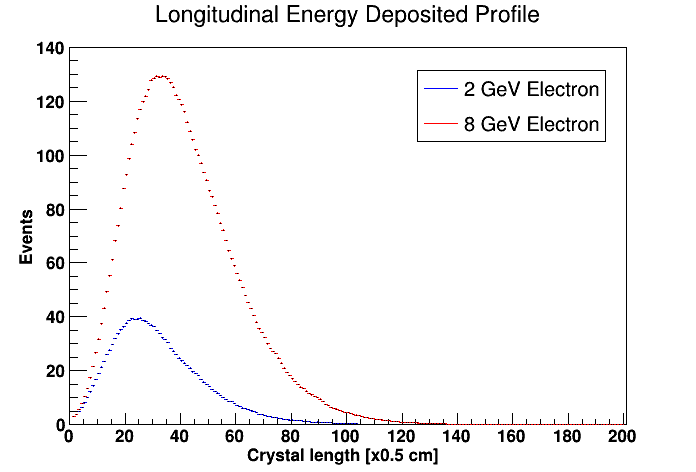

In [11]:
# To exhibit the canvas in the notebook, you need to draw it
c1.Draw()

In [12]:
#To save the canvas, update it and use the command SaveAs...
# c1.Update()
# c1.SaveAs('Longitudinal_Edep_profile.pdf')

# Get Stats from the histograms

In [13]:
# To get the data from the Statistics provided by the histrogram, use the Get commands...
print("Stats for 2 GeV electron")
print("Mean = %.3f"%(hist2GeV.GetMean()))
print("RMS = %.3f"%(hist2GeV.GetRMS()))
print("Number of Entries = %.3f"%(hist2GeV.GetEntries()))

Stats for 2 GeV electron
Mean = 32.413
RMS = 17.405
Number of Entries = 31801325.000


In [14]:
print("Stats for 2 GeV electron")
print("Mean = %.3f"%(hist8GeV.GetMean()))
print("RMS = %.3f"%(hist8GeV.GetRMS()))
print("Number of Entries = %.3f"%(hist8GeV.GetEntries()))

Stats for 2 GeV electron
Mean = 40.944
RMS = 19.983
Number of Entries = 126826139.000


# Close Histograms and ROOT files

In [15]:
# Don't forget to close the histogram
hist2GeV.SetDirectory(0)
histFile_2GeV.Close()
#
hist8GeV.SetDirectory(0)
histFile_8GeV.Close()